# Implementation of a sentiment analysis system from Youtube Video comments with traditional Machine Learning algorithms

We have applied different pre-processing steps to prepare the data. Such as tokenization, emoji and punctuation removal, Stemming. We have experimented with different feature combinations like TF-IDF, CountVectorizer, N-gram. We then did the classification with Naive Bayes, Support Vector Machine and K-Nearest Neighbour to find out which model has better performance.

### We used comments from [Jurassic World Dominion - Official Trailer [HD]](https://www.youtube.com/watch?v=fb5ELWi-ekk&t=2s&ab_channel=UniversalPictures) for creating our dataset for this system.

In [1]:
documents = []
labels = []

symbol_emoji = '''’'()[]♥{}<>:,‒–—―….«»-‐‘’“”;/⁄␠·&@*\\•^¤¢$€£¥₩₪†‡ðŸ™°¡¿¬#№%‰˜³‱¶′§~¨_|¦⁂☞∴‽※'"-\।()/'\"%#/@;:<>{}+=~|—‘’“”\.!?,`$^&*_\x8dâï¸\x8fâï¸\x8fâï¸\x8f\x9d
    +=🙂😀😄😆😅😂🤣😊☺️😌😉😏😍😘😗😙😚🤗👎👎😳🙃😇🦖🦕🦖🦖🦕🦖🦕🦖🦖🦖🦕🦖🦕🦖🦖🦕🦕🦖🦕🦖🦖🦕🦕🦖🦖🦕😁🤮🤦🦖🦖🧬🦖🙏🐷🐶🦊🐺🥴🤝ŽŽŽŽŽ
    😈😛😝😜😋🤤🤓😎🤑😒🙁☹️😞😔😖😓😢✌😢😭😟😣😩😫😕🤔🙄😤😠😡😶🤐😐😑😯😲😧😨😰😱😪😮😴😬👏🥺😃👀🍿😁🆑🎥🤥⭐🤧🤒🤯🗑🥰😃✋💯😷🤕🤯😵😁😁😁🔥🔥🤩🤩🥳🧮💥🎉
    🤢🤠🤡👿👹👺👻💀👽👾🤖💩🎃⚔👹\🐡🐟🐠🙂😀😂👍😐😡🏽🥲👍🏻🏻🤞🏻👌🏻🤙🏻🤘🏻🖕🏻☝️🏻💅🏻👉🏻👈🏻👇🏻👆🏻💚💙❤💔💕💜🖤🍿💓💞💗💘💖💝🥱🥱🥱🥱🥱🥱🥱🥱🤷💟'''

### Reading the Dataset from CSV and tokenizing it. Checking for emoji and punctuations and removing them. Stemming the words. Appending the comments in documents array. Appending the first token in labels array:


In [2]:
import nltk 
from nltk.stem import SnowballStemmer

stemmer = SnowballStemmer('english')

with open("Labelled_Dataset.csv", encoding='utf-8') as f:
    next(f)
    for line in f:
           tokens = line.strip().split()
           temp = []
           for char in tokens[1:]:
               no_punct = ""
               for ch in char:
                   if ch not in symbol_emoji:
                       no_punct = no_punct + ch

               if no_punct:
                       temp.append(stemmer.stem(no_punct))
                       
           documents.append(temp)
           labels.append(tokens[0])

In [3]:
print("Length of total data =", len(documents))

Length of total data = 1199


In [4]:
from collections import Counter
Counter(labels)

Counter({'Negative': 512, 'Neutral': 176, 'Positive': 511})

### Spliting the dataset into training (80%) and test set(20%):

In [5]:
split_point = int(0.80*len(documents))
trainDoc = documents[:split_point]
trainClass = labels[:split_point]
testDoc = documents[split_point:]
testClass = labels[split_point:]

In [6]:
print("Train data: ", len(trainDoc))
print("Test data: ", len(testDoc))
Counter(testClass)

Train data:  959
Test data:  240


Counter({'Negative': 89, 'Neutral': 53, 'Positive': 98})

In [7]:
print(documents)
#print(labels)

[['im', 'back', 'and', 'unimpress', 'the', 'film', 'is', 'the', 'second', 'wors', 'in', 'the', 'franchis'], ['what', 'timelin', 'did', 'a', 'jump', 'to', 'i', 'rememb', 'wait', 'for', '2023', 'for', 'this', 'movi', 'to', 'be', 'releas', 'this', 'past', 'summer'], ['the', 'worst', 'part', 'of', 'this', 'are', 'the', 'dinosaur', 'thrive', 'in', 'the', 'winter', 'snow'], ['babi', 'blue'], ['wow'], ['this', 'movi', 'was', 'amaz', 'it', 'was', 'well', 'thought', 'out', 'and', 'the', 'visual', 'were', 'stun', 'a', 'great', 'way', 'to', 'end', 'the', 'trilog'], ['go', 'watch'], ['all', 'jurass', 'park', 'movi', 'belong', 'to', 'sam', 'neil', 'nobodi', 'can', 'do', 'this', 'better', 'than', 'him'], ['funni', 'you', 'dont', 'see', 'ani', 'mammoth', 'in', 'these', 'film', 'becaus', 'we', 'can', 'clone', 'them', 'in', 'real', 'life', 'unlik', 'dinosaur'], ['those', 'raptor', 'sound', 'are', 'realli', 'get', 'old', 'jeez', 'come', 'on', 'where', 'are', 'the', 'good', 'movi', 'new', 'jurass', 'park

In [8]:
# a dummy function that just returns its input
def identity(x):
    return x

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB

### Naive Bayes with TF-IDF and Trigram: 

In [10]:
#Naive bayes with tfidf and trigram
vec = TfidfVectorizer(preprocessor = identity,
                        tokenizer = identity, min_df=2, ngram_range=(1,3))


In [11]:
# Pipeline combines the vectorizers with a Naive Bayes classifier
classifier = Pipeline( [('vec', vec),
                           ('cls', MultinomialNB())] )

# Train the classifier and build a model using the training documents
classifier.fit(trainDoc, trainClass)
  
# Outputs Predicted class for the test set
testGuess = classifier.predict(testDoc)

In [12]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support, ConfusionMatrixDisplay

In [13]:
prec, rec, f1, tureSum= precision_recall_fscore_support(testClass, testGuess, average='weighted', warn_for=tuple())

### Calculating the accuracy score using the Predefined Labels and Predicted Labels:

In [14]:
print("Naive Bayes with TF-idf:")
accuracy = accuracy_score(testClass, testGuess)
print("Accuracy = "+str(accuracy))
print("Precision: ", prec)
print("Recall:", rec)
print("F1 Score: ", f1)

Naive Bayes with TF-idf:
Accuracy = 0.6916666666666667
Precision:  0.756670238095238
Recall: 0.6916666666666667
F1 Score:  0.6227017572026692


In [15]:
# Showing the Confusion Matrix
print("Confusion Matrix for Naive Bayes with tfidf:")
cm = confusion_matrix(testClass, testGuess, labels=classifier.classes_)
print(classifier.classes_)
print(cm)

Confusion Matrix for Naive Bayes with tfidf:
['Negative' 'Neutral' 'Positive']
[[76  0 13]
 [25  3 25]
 [11  0 87]]


In [16]:
import matplotlib.pyplot as plt

### Showing the confusion matrix in plot:

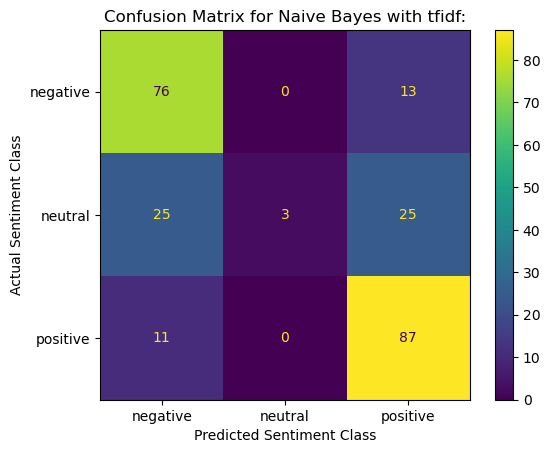

In [17]:
cm_show = ConfusionMatrixDisplay(cm, display_labels=['negative', 'neutral', 'positive'])
cm_show.plot()
cm_show.ax_.set(
                title='Confusion Matrix for Naive Bayes with tfidf:', 
                xlabel='Predicted Sentiment Class', 
                ylabel='Actual Sentiment Class')
plt.show()

In [18]:
from sklearn.feature_extraction.text import CountVectorizer

### Naive Bayes with CountVectorizer and Bigram: 

Naive Bayes with countvectorizer:
Accuracy = 0.7333333333333333
Precision:  0.732473385080528
Recall: 0.7333333333333333
F1 Score:  0.7146542878006628


Confusion Matrix for Naive Bayes with countvectorizer:
['Negative' 'Neutral' 'Positive']
[[75  4 10]
 [11 18 24]
 [12  3 83]]


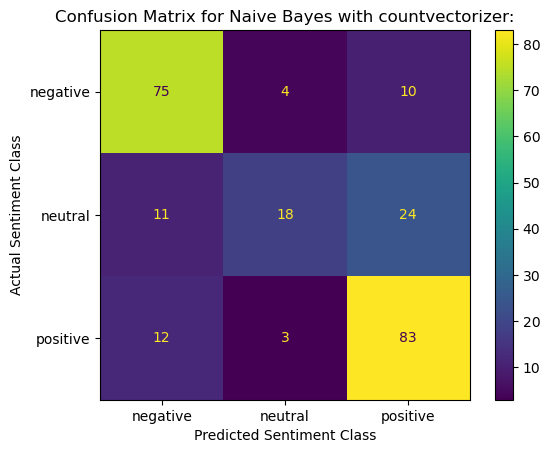

In [19]:
vec = CountVectorizer(preprocessor = identity, tokenizer = identity, min_df=2, ngram_range=(1,2))
# Pipeline combines the vectorizers with a Naive Bayes classifier
classifier = Pipeline( [('vec', vec),
                           ('cls', MultinomialNB())] )

# Train the classifier and build a model using the training documents
classifier.fit(trainDoc, trainClass)
  
# Outputs Predicted class for the test set
testGuess = classifier.predict(testDoc)
prec, rec, f1, tureSum= precision_recall_fscore_support(testClass, testGuess, average='weighted', warn_for=tuple())

# Calculating the accuracy score using the Gold Labels and Predicted Labels
print("Naive Bayes with countvectorizer:")
accuracy = accuracy_score(testClass, testGuess)
print("Accuracy = "+str(accuracy))
print("Precision: ", prec)
print("Recall:", rec)
print("F1 Score: ", f1)
print("\n")

# Showing the Confusion Matrix
print("Confusion Matrix for Naive Bayes with countvectorizer:")
cm = confusion_matrix(testClass, testGuess, labels=classifier.classes_)
print(classifier.classes_)
print(cm)

#Showing the plot
cm_show = ConfusionMatrixDisplay(cm, display_labels=['negative', 'neutral', 'positive'])
cm_show.plot()
cm_show.ax_.set(
                title='Confusion Matrix for Naive Bayes with countvectorizer:', 
                xlabel='Predicted Sentiment Class', 
                ylabel='Actual Sentiment Class')
plt.show()

In [20]:
from sklearn.svm import LinearSVC

### SVM with TF-IDF and Bigram:

SVM with Tf-idf: 
Accuracy =  0.8083333333333333
Precision:  0.8078749833266641
Recall: 0.8083333333333333
F1 Score:  0.8042124135089032


Confusion Matrix for SVM with Tfidf:
['Negative' 'Neutral' 'Positive']
[[79  2  8]
 [10 32 11]
 [ 9  6 83]]


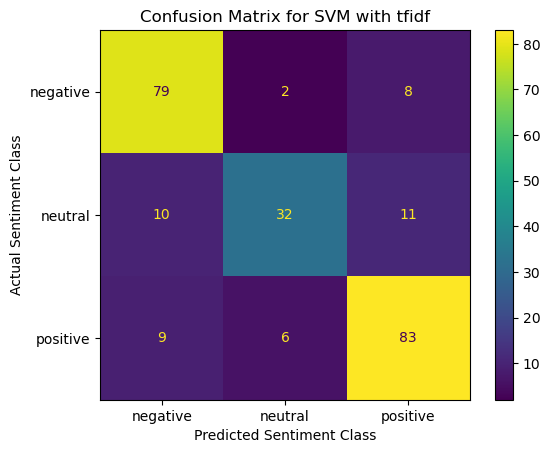

In [21]:
vec = TfidfVectorizer(preprocessor = identity, tokenizer = identity, min_df=2, ngram_range=(1,2))

#Using Linear SVC
L_svc=Pipeline([('vec',vec),('ln_svc', LinearSVC())])
L_svc.fit(trainDoc,trainClass)
testGuess=L_svc.predict(testDoc)
#classguess=L_svc.predict(predict)
L_svc_cm = confusion_matrix(testClass, testGuess, labels=L_svc.classes_)
prec, rec, f1, tureSum= precision_recall_fscore_support(testClass, testGuess, average='weighted', warn_for=tuple())
  
print("SVM with Tf-idf: ")
#print("predicted class:", classguess)
accuracy = accuracy_score(testClass, testGuess)
print("Accuracy = ", accuracy)
print("Precision: ", prec)
print("Recall:", rec)
print("F1 Score: ", f1)
print("\n") 
  
# Showing the Confusion Matrix
print("Confusion Matrix for SVM with Tfidf:")
print(L_svc.classes_)
print(L_svc_cm) 
 
#Showing the plot
cm_show = ConfusionMatrixDisplay(L_svc_cm, display_labels=['negative', 'neutral', 'positive'])
cm_show.plot()
cm_show.ax_.set(
                title='Confusion Matrix for SVM with tfidf', 
                xlabel='Predicted Sentiment Class', 
                ylabel='Actual Sentiment Class')
plt.show()

### SVM with CountVectorizer:

SVM with countvectorizer: 
Accuracy =  0.8
Precision:  0.8005958225425064
Recall: 0.8
F1 Score:  0.7991399189928905


Confusion Matrix for SVM with countvectorizer:
['Negative' 'Neutral' 'Positive']
[[71  5 13]
 [ 8 36  9]
 [ 4  9 85]]


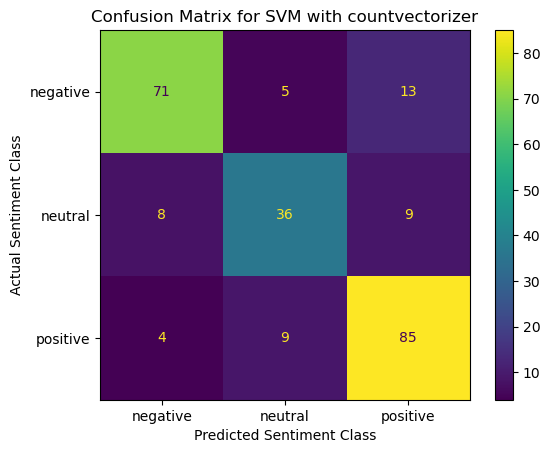

In [22]:
vec = CountVectorizer(preprocessor = identity, tokenizer = identity, min_df=2)
#Using Linear SVC
L_svc=Pipeline([('vec',vec),('ln_svc', LinearSVC())])
L_svc.fit(trainDoc,trainClass)
testGuess=L_svc.predict(testDoc)
#classguess=L_svc.predict(predict)
L_svc_cm = confusion_matrix(testClass, testGuess, labels=L_svc.classes_)
prec, rec, f1, tureSum= precision_recall_fscore_support(testClass, testGuess, average='weighted', warn_for=tuple())
  
print("SVM with countvectorizer: ")
#print("predicted class:", classguess)
accuracy = accuracy_score(testClass, testGuess)
print("Accuracy = ", accuracy)
print("Precision: ", prec)
print("Recall:", rec)
print("F1 Score: ", f1)
print("\n") 
  
# Showing the Confusion Matrix
print("Confusion Matrix for SVM with countvectorizer:")
print(L_svc.classes_)
print(L_svc_cm) 
 
#Showing the plot
cm_show = ConfusionMatrixDisplay(L_svc_cm, display_labels=['negative', 'neutral', 'positive'])
cm_show.plot()
cm_show.ax_.set(
                title='Confusion Matrix for SVM with countvectorizer', 
                xlabel='Predicted Sentiment Class', 
                ylabel='Actual Sentiment Class')
plt.show()

In [23]:
from sklearn.neighbors import KNeighborsClassifier

### KNN with TF-IDF and Trigram:

KNN with TF-idf:
Accuracy = 0.5208333333333334
Precision:  0.5359930895552836
Recall: 0.5208333333333334
F1 Score:  0.4976642139649705



Confusion Matrix for KNN with Tfidf:
['Negative' 'Neutral' 'Positive']
[[46  2 41]
 [24 10 19]
 [25  4 69]]


C:\Users\Meghna\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


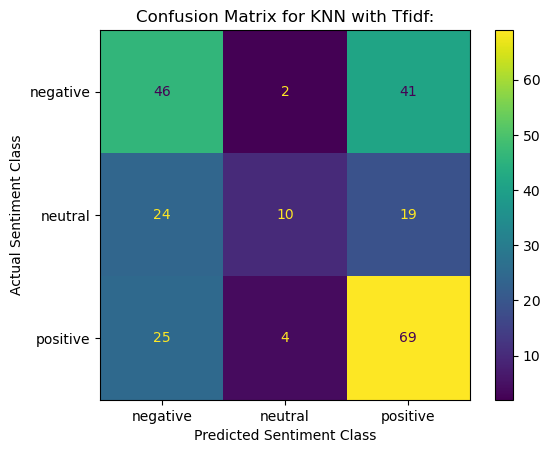

In [24]:
vec = TfidfVectorizer(preprocessor = identity,
                              tokenizer = identity, min_df=2, ngram_range=(1,3))

knn = Pipeline( [('vec', vec), ('cls', KNeighborsClassifier(n_neighbors=5))] )    
knn.fit(trainDoc, trainClass)
ypred = knn.predict(testDoc) 
prec, rec, f1, tureSum= precision_recall_fscore_support(testClass, ypred, average='weighted', warn_for=tuple())

print("KNN with TF-idf:")
accuracy = accuracy_score(testClass, ypred)
print("Accuracy = "+str(accuracy))
print("Precision: ", prec)
print("Recall:", rec)
print("F1 Score: ", f1)
print("\n")
    
# Showing the Confusion Matrix
print("\nConfusion Matrix for KNN with Tfidf:")
cm = confusion_matrix(testClass, ypred, labels=knn.classes_)
print(knn.classes_)
print(cm)
    
#Showing the plot
cm_show = ConfusionMatrixDisplay(cm, display_labels=['negative', 'neutral', 'positive'])
cm_show.plot()
cm_show.ax_.set(
                  title='Confusion Matrix for KNN with Tfidf:', 
                  xlabel='Predicted Sentiment Class', 
                  ylabel='Actual Sentiment Class')
plt.show()

### KNN with CountVectorizer and Trigram:

KNN with Countvectorizer:
Accuracy = 0.5833333333333334
Precision:  0.5859469986774134
Recall: 0.5833333333333334
F1 Score:  0.5757568777112121



Confusion Matrix for KNN with Countvectorizer:
['Negative' 'Neutral' 'Positive']
[[52  6 31]
 [23 19 11]
 [23  6 69]]


C:\Users\Meghna\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


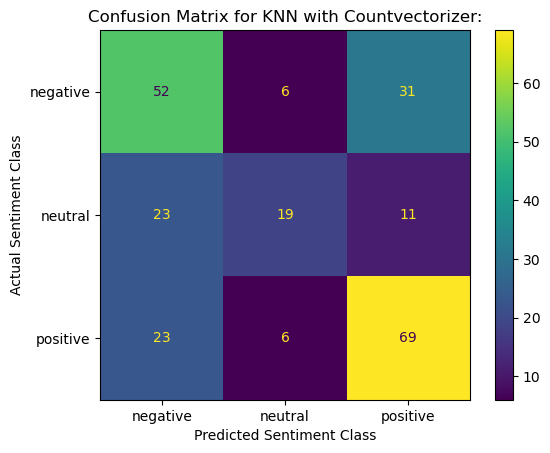

In [25]:
vec = CountVectorizer(preprocessor = identity, tokenizer = identity, min_df=2, ngram_range=(1,3))

knn = Pipeline( [('vec', vec), ('cls', KNeighborsClassifier(n_neighbors=5))] )    
knn.fit(trainDoc, trainClass)
ypred = knn.predict(testDoc) 
prec, rec, f1, tureSum= precision_recall_fscore_support(testClass, ypred, average='weighted', warn_for=tuple())

print("KNN with Countvectorizer:")
accuracy = accuracy_score(testClass, ypred)
print("Accuracy = "+str(accuracy))
print("Precision: ", prec)
print("Recall:", rec)
print("F1 Score: ", f1)
print("\n")
    
# Showing the Confusion Matrix
print("\nConfusion Matrix for KNN with Countvectorizer:")
cm = confusion_matrix(testClass, ypred, labels=knn.classes_)
print(knn.classes_)
print(cm)
    
#Showing the plot
cm_show = ConfusionMatrixDisplay(cm, display_labels=['negative', 'neutral', 'positive'])
cm_show.plot()
cm_show.ax_.set(
                  title='Confusion Matrix for KNN with Countvectorizer:', 
                  xlabel='Predicted Sentiment Class', 
                  ylabel='Actual Sentiment Class')
plt.show()

### Classification results based on different feature combination and classifier: 

* Emoji and punctuation removal + Stemmer + TF-IDF + Trigram + Naive Bayes classifier: accuracy of 69%
* Emoji and punctuation removal + Stemmer + TF-IDF + Naive Bayes classifier: accuracy of 71%
* Emoji and punctuation removal + Stemmer + CountVectorizer + Bigram  + Naive Bayes classifier: accuracy of 73.3%
* Emoji and punctuation removal + Stemmer + CountVectorizer + Naive Bayes classifier: accuracy of 74%
* **Emoji and punctuation removal + Stemmer + TF-IDF + Bigram + SVM: accuracy of 81%**
* Emoji and punctuation removal + Stemmer + CountVectorizer + Bigram + SVM: accuracy of 78%
* Emoji and punctuation removal + Stemmer + CountVectorizer + SVM: accuracy of 80%
* Emoji and punctuation removal + Stemmer + TF-IDF + Trigram + KNN: accuracy of 52%
* Emoji and punctuation removal + Stemmer + CountVectorizer + Bigram + KNN: accuracy of 57%
* Emoji and punctuation removal + Stemmer + CountVectorizer + Trigram + KNN: accuracy of 58%

In addition to these combinations, we have also evaluated the results by removing stop words for these classification approaches. Which was instead degrading the performance for every classification.